### Win probability Model (in reference to 2nd innings of each match)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [2]:
#calling in necessary datasets
#detailed dataset for year 2019-2022
delivery = pd.read_csv('del_csv.csv')
#summary dataset for year 2019-2022
match = pd.read_csv('Book1.csv')
#detailed dataset for year 2016-2019
delivery_16 = pd.read_csv('1619_csv_01.csv')
#summary dataset for year 2016-2019
match_16= pd.read_csv('new_1619.csv')

In [3]:
# calling testing data of dl method
dl_test = pd.read_csv('dl_method_t20.csv')

In [4]:
#visualizing datafarme
delivery_16

,match_id,season,venue,innings,batting_team,bowling_team,batsman,non_striker,bowler,batsman_run,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs
0,1001349,2016/17,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,1,1,0
1,1001349,2016/17,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1,2,0
2,1001349,2016/17,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1,3,1
3,1001349,2016/17,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,AJ Finch,SL Malinga,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,4,2
4,1001349,2016/17,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,AJ Finch,SL Malinga,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40302,995469,2016,R Premadasa Stadium,2,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,1,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1,18,1,1
40303,995469,2016,R Premadasa Stadium,2,Australia,Sri Lanka,PM Nevill,TM Head,SS Pathirana,3,...,NaN,NaN,NaN,NaN,NaN,NaN,17.2,18,2,3
40304,995469,2016,R Premadasa Stadium,2,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.3,18,3,0
40305,995469,2016,R Premadasa Stadium,2,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.4,18,4,0


In [5]:
#dataset visual
delivery

,match_id,season,venue,innings,batting_team,bowling_team,batsman,non_striker,bowler,batsman_run,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs
0,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,1.0,1.0,0.0
1,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1.0,2.0,4.0
2,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,3.0,0.0
3,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,4.0,1.0
4,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,DA Warner,AJ Finch,SL Malinga,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141226,1310166.0,2022,"Desert Springs Cricket Ground, Almeria",2.0,Norway,Spain,Raza Iqbal,Vinay Ravi,Yasir Ali,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,18.1,19.0,1.0,2.0
141227,1310166.0,2022,"Desert Springs Cricket Ground, Almeria",2.0,Norway,Spain,Raza Iqbal,Vinay Ravi,Yasir Ali,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,18.2,19.0,2.0,1.0
141228,1310166.0,2022,"Desert Springs Cricket Ground, Almeria",2.0,Norway,Spain,Vinay Ravi,Raza Iqbal,Yasir Ali,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,18.3,19.0,3.0,2.0
141229,1310166.0,2022,"Desert Springs Cricket Ground, Almeria",2.0,Norway,Spain,Vinay Ravi,Raza Iqbal,Yasir Ali,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,18.4,19.0,4.0,2.0


In [6]:
#merging delivery datafarmes, detailed dataframe 2016-2022
delivery = delivery.append(delivery_16, ignore_index=True)

In [7]:
#visualizing merged datafarme
delivery

,match_id,season,venue,innings,batting_team,bowling_team,batsman,non_striker,bowler,batsman_run,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs
0,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,1.0,1.0,0.0
1,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1.0,2.0,4.0
2,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,3.0,0.0
3,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,4.0,1.0
4,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,DA Warner,AJ Finch,SL Malinga,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181533,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1,18.0,1.0,1.0
181534,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,PM Nevill,TM Head,SS Pathirana,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.2,18.0,2.0,3.0
181535,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.3,18.0,3.0,0.0
181536,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.4,18.0,4.0,0.0


In [8]:
#appending match dataframes, summary dataframe 2016-2022
match = match.append(match_16, ignore_index=True) 

In [9]:
#datasets shape
delivery.shape


(181538, 24)

In [10]:
#match dataframe shape
match.shape

(419, 21)

In [11]:
match.head()

,match_id,team1,team2,gender,season,date,event,match_number,venue,city,...,toss_decision,player_of_match,umpire,umpire.1,reserve_umpire,tv_umpire,match_referee,result,winner_by_runs,winner_by_wicket
0,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,field,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6
1,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,field,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0
2,1183524,Australia,Sri Lanka,male,2019/20,43765.0,Sri Lanka tour of Australia,1,Adelaide Oval,Adelaide,...,field,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,134,0
3,1183525,Australia,Sri Lanka,male,2019/20,43768.0,Sri Lanka tour of Australia,2,"Brisbane Cricket Ground, Woolloongabba",Brisbane,...,bat,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,0,9
4,1183526,Australia,Sri Lanka,male,2019/20,43770.0,Sri Lanka tour of Australia,3,Melbourne Cricket Ground,Melbourne,...,field,DA Warner,P Wilson,SAJ Craig,PJ Gillespie,GA Abood,J Srinath,Australia,0,7


In [12]:
#dataset visual
delivery

,match_id,season,venue,innings,batting_team,bowling_team,batsman,non_striker,bowler,batsman_run,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs
0,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,1.0,1.0,0.0
1,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1.0,2.0,4.0
2,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,3.0,0.0
3,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,4.0,1.0
4,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,DA Warner,AJ Finch,SL Malinga,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181533,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.1,18.0,1.0,1.0
181534,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,PM Nevill,TM Head,SS Pathirana,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.2,18.0,2.0,3.0
181535,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.3,18.0,3.0,0.0
181536,995469.0,2016,R Premadasa Stadium,2.0,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17.4,18.0,4.0,0.0


In [13]:
match.head()

,match_id,team1,team2,gender,season,date,event,match_number,venue,city,...,toss_decision,player_of_match,umpire,umpire.1,reserve_umpire,tv_umpire,match_referee,result,winner_by_runs,winner_by_wicket
0,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,field,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6
1,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,field,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0
2,1183524,Australia,Sri Lanka,male,2019/20,43765.0,Sri Lanka tour of Australia,1,Adelaide Oval,Adelaide,...,field,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,134,0
3,1183525,Australia,Sri Lanka,male,2019/20,43768.0,Sri Lanka tour of Australia,2,"Brisbane Cricket Ground, Woolloongabba",Brisbane,...,bat,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,0,9
4,1183526,Australia,Sri Lanka,male,2019/20,43770.0,Sri Lanka tour of Australia,3,Melbourne Cricket Ground,Melbourne,...,field,DA Warner,P Wilson,SAJ Craig,PJ Gillespie,GA Abood,J Srinath,Australia,0,7


In [14]:
#using group_by to create total score dataframe
total_score_df = delivery.groupby(['match_id','innings']).sum()['total_runs'].reset_index()

In [15]:
#selcting rows of 1st innings from created dataframe
total_score_df = total_score_df[total_score_df['innings'] == 1]

In [16]:
total_score_df

,match_id,innings,total_runs
0,936153.0,1.0,126.0
2,936155.0,1.0,113.0
4,936157.0,1.0,169.0
6,951321.0,1.0,186.0
8,951329.0,1.0,126.0
...,...,...,...
1573,1310162.0,1.0,129.0
1575,1310163.0,1.0,120.0
1577,1310164.0,1.0,78.0
1579,1310165.0,1.0,107.0


In [17]:
#merging data of created dataframe 
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='match_id',right_on='match_id')

In [18]:
match_df.head()

,match_id,team1,team2,gender,season,date,event,match_number,venue,city,...,player_of_match,umpire,umpire.1,reserve_umpire,tv_umpire,match_referee,result,winner_by_runs,winner_by_wicket,total_runs
0,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6,188.0
1,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6,188.0
2,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0,167.0
3,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0,167.0
4,1183524,Australia,Sri Lanka,male,2019/20,43765.0,Sri Lanka tour of Australia,1,Adelaide Oval,Adelaide,...,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,134,0,233.0


In [19]:
#check number of teams present in the data
match_df['team1'].unique()

array(['India', 'Afghanistan', 'Australia', 'South Africa', 'New Zealand',
       'Netherlands', 'West Indies', 'Sri Lanka', 'Bangladesh', 'Ireland',
       'Oman', 'England', 'Pakistan', 'Scotland', 'Hong Kong',
       'United Arab Emirates', 'Zimbabwe', 'Namibia', 'Nepal'],
      dtype=object)

In [20]:
#create a list of teams required
teams = [
    'India', 'Afghanistan', 'Australia', 'South Africa', 'New Zealand',
        'West Indies', 'Sri Lanka', 'Bangladesh', 'Ireland',
       'England', 'Pakistan', 'Zimbabwe'
]

In [21]:
#selecting matches from match_df played by teams required
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [22]:
match_df.shape

(369, 22)

In [23]:
match_df.shape

(369, 22)

In [24]:
#select essential columns for further analysis
match_df = match_df[['match_id','city','result','total_runs']]

In [25]:
#merging the manipulated data frame with delivery dataset
delivery_df = match_df.merge(delivery,on='match_id')

In [26]:
#select 2nd inning data for required pre-modelling steps
delivery_df = delivery_df[delivery_df['innings'] == 2]

In [27]:
delivery_df.head(3)

,match_id,city,result,total_runs_x,season,venue,innings,batting_team,bowling_team,batsman,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs_y
121,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,1.0,1.0,0.0
122,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1.0,2.0,0.0
123,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,3.0,0.0


In [28]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df = delivery_df[delivery_df["current_score"] <= delivery_df["total_runs_x"]]

In [29]:
delivery_df.describe()

,match_id,total_runs_x,innings,batsman_run,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs_y,current_score
count,4.094200e+04,40942.000000,40942.0,40942.000000,40942.000000,1367.000000,143.000000,95.000000,587.000000,0.0,0.0,0.0,40942.000000,40942.000000,40942.000000,40942.000000,40942.000000
mean,1.171142e+06,164.604758,2.0,1.202311,0.065752,1.162399,1.027972,2.000000,1.304940,NaN,NaN,NaN,9.086391,9.725026,3.613649,1.268062,71.300498
std,9.611316e+04,33.924493,0.0,1.591031,0.329871,0.681242,0.334497,1.383797,0.840948,NaN,NaN,NaN,5.475152,5.474608,1.813410,1.578778,46.054279
min,9.361530e+05,55.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.100000,1.000000,1.000000,0.000000,0.000000
25%,1.122730e+06,142.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,4.400000,5.000000,2.000000,0.000000,33.000000
50%,1.187669e+06,164.000000,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,9.100000,10.000000,4.000000,1.000000,67.000000
75%,1.256720e+06,188.000000,2.0,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,NaN,NaN,NaN,13.500000,14.000000,5.000000,1.000000,105.000000
max,1.299833e+06,278.000000,2.0,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,19.800000,20.000000,9.000000,7.000000,244.000000


In [30]:
# creating required columns for further processing and analysis

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] +1

delivery_df['Ball'] = delivery_df['Ball'].astype('int')
delivery_df['balls_left'] = 126 - (delivery_df['Over']*6 + delivery_df['Ball'])
delivery_df = delivery_df[delivery_df["balls_left"] >= 0 ]

In [31]:
delivery_df.describe()

,match_id,total_runs_x,innings,batsman_run,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs_y,current_score,runs_left,balls_left
count,4.090900e+04,40909.000000,40909.0,40909.000000,40909.000000,1367.000000,143.000000,95.000000,587.000000,0.0,0.0,0.0,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000
mean,1.171134e+06,164.601579,2.0,1.202058,0.065805,1.162399,1.027972,2.000000,1.304940,NaN,NaN,NaN,9.077817,9.716737,3.610795,1.267863,71.236232,94.365347,64.088782
std,9.611955e+04,33.930992,0.0,1.590555,0.329999,0.681242,0.334497,1.383797,0.840948,NaN,NaN,NaN,5.469028,5.469029,1.811326,1.578297,46.012389,50.285694,32.834153
min,9.361530e+05,55.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.100000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.122730e+06,142.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,4.400000,5.000000,2.000000,0.000000,33.000000,54.000000,37.000000
50%,1.187669e+06,164.000000,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,9.100000,10.000000,4.000000,1.000000,67.000000,93.000000,65.000000
75%,1.256720e+06,188.000000,2.0,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,NaN,NaN,NaN,13.500000,14.000000,5.000000,1.000000,105.000000,131.000000,92.000000
max,1.299833e+06,278.000000,2.0,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,19.600000,20.000000,9.000000,7.000000,244.000000,273.000000,119.000000


In [32]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,result,total_runs_x,season,venue,innings,batting_team,bowling_team,batsman,...,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs_y,current_score,runs_left,balls_left,wickets
121,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,0.1,1.0,1,0.0,0.0,189.0,119.0,10
122,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,0.2,1.0,2,0.0,0.0,189.0,118.0,10
123,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,0.3,1.0,3,0.0,0.0,189.0,117.0,10
124,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,0.4,1.0,4,0.0,0.0,189.0,116.0,10
125,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,NaN,NaN,0.5,1.0,5,1.0,1.0,188.0,115.0,10


In [33]:
delivery_df.describe()

,match_id,total_runs_x,innings,batsman_run,extras,wides,noballs,byes,legbyes,penalty,...,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs_y,current_score,runs_left,balls_left,wickets
count,4.090900e+04,40909.000000,40909.0,40909.000000,40909.000000,1367.000000,143.000000,95.000000,587.000000,0.0,...,0.0,0.0,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000
mean,1.171134e+06,164.601579,2.0,1.202058,0.065805,1.162399,1.027972,2.000000,1.304940,NaN,...,NaN,NaN,9.077817,9.716737,3.610795,1.267863,71.236232,94.365347,64.088782,7.304065
std,9.611955e+04,33.930992,0.0,1.590555,0.329999,0.681242,0.334497,1.383797,0.840948,NaN,...,NaN,NaN,5.469028,5.469029,1.811326,1.578297,46.012389,50.285694,32.834153,2.282329
min,9.361530e+05,55.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,0.100000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-2.000000
25%,1.122730e+06,142.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,4.400000,5.000000,2.000000,0.000000,33.000000,54.000000,37.000000,6.000000
50%,1.187669e+06,164.000000,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,9.100000,10.000000,4.000000,1.000000,67.000000,93.000000,65.000000,8.000000
75%,1.256720e+06,188.000000,2.0,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,NaN,...,NaN,NaN,13.500000,14.000000,5.000000,1.000000,105.000000,131.000000,92.000000,9.000000
max,1.299833e+06,278.000000,2.0,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,NaN,...,NaN,NaN,19.600000,20.000000,9.000000,7.000000,244.000000,273.000000,119.000000,10.000000


In [34]:
#creating columns with diffrenet run rate statistics
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [35]:
delivery_df.describe()

,match_id,total_runs_x,innings,batsman_run,extras,wides,noballs,byes,legbyes,penalty,...,ball,Over,Ball,total_runs_y,current_score,runs_left,balls_left,wickets,crr,rrr
count,4.090900e+04,40909.000000,40909.0,40909.000000,40909.000000,1367.000000,143.000000,95.000000,587.000000,0.0,...,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,4.090900e+04
mean,1.171134e+06,164.601579,2.0,1.202058,0.065805,1.162399,1.027972,2.000000,1.304940,NaN,...,9.077817,9.716737,3.610795,1.267863,71.236232,94.365347,64.088782,7.304065,7.610029,inf
std,9.611955e+04,33.930992,0.0,1.590555,0.329999,0.681242,0.334497,1.383797,0.840948,NaN,...,5.469028,5.469029,1.811326,1.578297,46.012389,50.285694,32.834153,2.282329,7.753935,NaN
min,9.361530e+05,55.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,0.100000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-2.000000,0.000000,6.818182e-02
25%,1.122730e+06,142.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,4.400000,5.000000,2.000000,0.000000,33.000000,54.000000,37.000000,6.000000,6.000000,6.987342e+00
50%,1.187669e+06,164.000000,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,9.100000,10.000000,4.000000,1.000000,67.000000,93.000000,65.000000,8.000000,7.450549,8.896552e+00
75%,1.256720e+06,188.000000,2.0,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,NaN,...,13.500000,14.000000,5.000000,1.000000,105.000000,131.000000,92.000000,9.000000,8.765217,1.110345e+01
max,1.299833e+06,278.000000,2.0,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,NaN,...,19.600000,20.000000,9.000000,7.000000,244.000000,273.000000,119.000000,10.000000,930.000000,inf


In [36]:
#defining function
def result(row):
    return 1 if row['batting_team'] == row['result'] else 0

In [37]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [38]:
#selecting necessary/required columns from the data
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [39]:
final_df = final_df.sample(final_df.shape[0])


In [40]:
final_df.sample(3)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
51956,Sri Lanka,Afghanistan,Kolkata,68.0,46.0,7,153.0,6.972973,8.869565,1
76471,Pakistan,Zimbabwe,0,49.0,35.0,8,162.0,8.047059,8.400000,1
54822,Bangladesh,New Zealand,Kolkata,113.0,75.0,7,145.0,4.400000,9.040000,0


In [41]:
#dropping na values rows from the data
final_df.dropna(inplace=True)

In [42]:
# Replace infinite updated data with nan
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
final_df.dropna(inplace=True)
#print(df)

In [43]:
final_df = final_df[final_df['balls_left'] != 0]

In [44]:
final_df.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,40796.000000,40796.000000,40796.000000,40796.000000,40796.000000,40796.000000,40796.000000
mean,94.559491,64.266301,7.317261,164.562482,7.609580,10.700466,0.475708
std,50.203529,32.705643,2.270065,33.934888,7.764398,14.448391,0.499416
min,1.000000,1.000000,-2.000000,55.000000,0.000000,0.068182,0.000000
25%,55.000000,37.000000,6.000000,142.000000,6.000000,6.980769,0.000000
50%,94.000000,65.000000,8.000000,164.000000,7.448276,8.890909,0.000000
75%,131.000000,93.000000,9.000000,188.000000,8.769231,11.076923,1.000000
max,273.000000,119.000000,10.000000,278.000000,930.000000,822.000000,1.000000


In [45]:
final_df.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,40796.000000,40796.000000,40796.000000,40796.000000,40796.000000,40796.000000,40796.000000
mean,94.559491,64.266301,7.317261,164.562482,7.609580,10.700466,0.475708
std,50.203529,32.705643,2.270065,33.934888,7.764398,14.448391,0.499416
min,1.000000,1.000000,-2.000000,55.000000,0.000000,0.068182,0.000000
25%,55.000000,37.000000,6.000000,142.000000,6.000000,6.980769,0.000000
50%,94.000000,65.000000,8.000000,164.000000,7.448276,8.890909,0.000000
75%,131.000000,93.000000,9.000000,188.000000,8.769231,11.076923,1.000000
max,273.000000,119.000000,10.000000,278.000000,930.000000,822.000000,1.000000


In [46]:
#splitting data into test and train
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
86172,Australia,India,Visakhapatnam,2.0,1.0,3,126.0,6.302521,12.000000
53086,West Indies,Sri Lanka,Bangalore,100.0,109.0,10,122.0,12.545455,5.504587
37529,South Africa,Sri Lanka,Colombo,11.0,40.0,9,103.0,6.975000,1.650000
24793,England,Sri Lanka,Cardiff,1.0,18.0,8,129.0,7.588235,0.333333
64312,Bangladesh,South Africa,Potchefstroom,125.0,40.0,3,224.0,7.500000,18.750000
...,...,...,...,...,...,...,...,...,...
22061,Pakistan,England,Leeds,41.0,116.0,1,200.0,240.000000,2.120690
80492,Ireland,Afghanistan,Bready,105.0,62.0,6,160.0,5.793103,10.161290
26417,Pakistan,South Africa,Centurion,17.0,12.0,4,144.0,7.111111,8.500000
61044,England,India,Bangalore,147.0,78.0,8,202.0,8.000000,11.307692


In [48]:
#importing necesaary libraries and using one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [49]:
#using logistic regression
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [50]:
#training the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [51]:
#get the attributes of your model. For example, the attribute .classes_ represents the array of distinct values that y takes:
#This is the example of binary classification, and y can be 0 or 1, as indicated above.
pipe.classes_

array([0, 1], dtype=int64)

#### Evaluate the model
Once a model is defined, check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one:


In [52]:
pipe.predict_proba(X_train)

array([[3.00999604e-01, 6.99000396e-01],
       [2.96784615e-02, 9.70321539e-01],
       [7.09504260e-05, 9.99929050e-01],
       ...,
       [9.46056576e-02, 9.05394342e-01],
       [9.69901109e-01, 3.00988907e-02],
       [4.32971701e-01, 5.67028299e-01]])

In [53]:
pipe.predict_proba(X_test)

array([[9.99984808e-01, 1.51915094e-05],
       [9.59976452e-01, 4.00235475e-02],
       [1.86298091e-02, 9.81370191e-01],
       ...,
       [1.00000000e+00, 7.98031813e-28],
       [9.80478967e-01, 1.95210334e-02],
       [2.58670334e-03, 9.97413297e-01]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

In [54]:
#the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():
pipe.predict(X_train)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [55]:
pipe.score(X_test, y_test)

0.9012254901960784

In [56]:
#pipe.score(X_test, y_test)

In [57]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[3889,  408],
       [ 398, 3465]], dtype=int64)

In [58]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[3889,  408],
       [ 398, 3465]], dtype=int64)

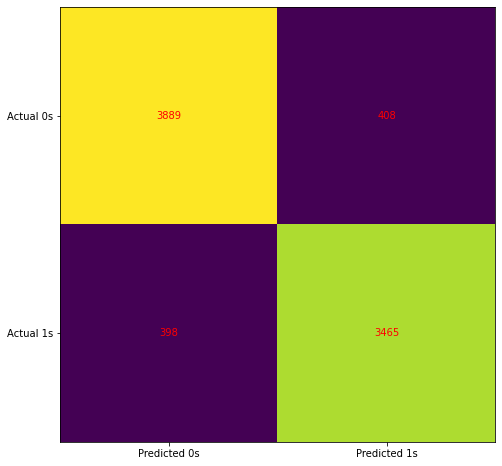

In [59]:
cm = confusion_matrix(y_test, pipe.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In this figure, different colors represent different numbers and similar colors represent similar numbers. Heatmaps are a nice and convenient way to represent a matrix.

In [60]:
#comprehensive report on the classification with classification_report():

print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4297
           1       0.89      0.90      0.90      3863

    accuracy                           0.90      8160
   macro avg       0.90      0.90      0.90      8160
weighted avg       0.90      0.90      0.90      8160



In [61]:
def Statistics(data):
  # Classification Report 
  print("Classification Report is shown below")
  print(classification_report(y_test, pipe.predict(X_test)))
#print(classification_report(data['actual labels'],data['predicted labels']))
  # Confusion matrix
  print("Confusion matrix is shown below")
  cm=confusion_matrix(y_test, pipe.predict(X_test))
  
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')


Classification Report is shown below
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4297
           1       0.89      0.90      0.90      3863

    accuracy                           0.90      8160
   macro avg       0.90      0.90      0.90      8160
weighted avg       0.90      0.90      0.90      8160

Confusion matrix is shown below


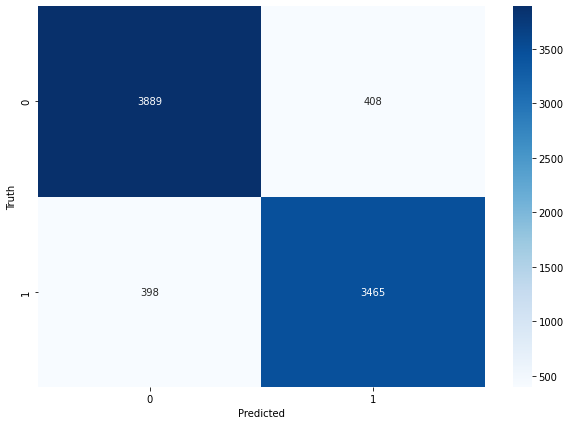

In [62]:
Statistics(final_df)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.967


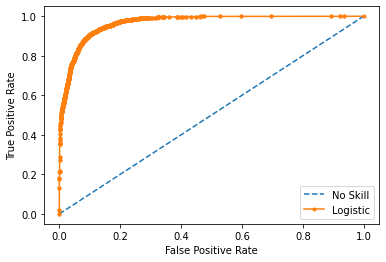

In [63]:

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = pipe.predict_proba(X_test)
lr_probs = lr_probs[:, 1]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.896 auc=0.961


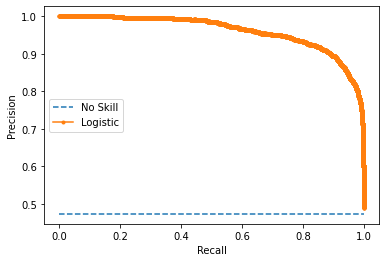

In [64]:


lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, pipe.predict(X_test)), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Using different alternate algorithms


In [65]:
# Instantiate and fit the RandomForestClassifier
#forest = RandomForestClassifier()
#forest.fit(X_train, y_train)

forest = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [66]:
forest.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [67]:
#forest.score(X_test, y_test)

In [68]:

tree = Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

In [69]:
tree.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', DecisionTreeClassifier())])

In [70]:
tree.score(X_test, y_test)

0.9957107843137255

In [71]:

knc = Pipeline(steps=[
    ('step1',trf),
    ('step2',KNeighborsClassifier(n_neighbors=3))
])

In [72]:
knc.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', KNeighborsClassifier(n_neighbors=3))])

In [73]:
knc.score(X_test, y_test)

0.9575980392156863

In [74]:
print(classification_report(y_test, tree.predict(X_test), output_dict=True))

{'0': {'precision': 0.9944315545243619, 'recall': 0.9974400744705608, 'f1-score': 0.9959335424654351, 'support': 4297}, '1': {'precision': 0.9971428571428571, 'recall': 0.9937872120113901, 'f1-score': 0.9954622066640736, 'support': 3863}, 'accuracy': 0.9957107843137255, 'macro avg': {'precision': 0.9957872058336095, 'recall': 0.9956136432409755, 'f1-score': 0.9956978745647543, 'support': 8160}, 'weighted avg': {'precision': 0.9957151037909362, 'recall': 0.9957107843137255, 'f1-score': 0.9957104088624131, 'support': 8160}}


In [75]:
df123 = classification_report(y_test, tree.predict(X_test), output_dict=True)
dfx = pd.DataFrame(df123).transpose()
dfx['models'] = 'Decision_Tree_Cassification'
dfx

,precision,recall,f1-score,support,models
0,0.994432,0.997440,0.995934,4297.000000,Decision_Tree_Cassification
1,0.997143,0.993787,0.995462,3863.000000,Decision_Tree_Cassification
accuracy,0.995711,0.995711,0.995711,0.995711,Decision_Tree_Cassification
macro avg,0.995787,0.995614,0.995698,8160.000000,Decision_Tree_Cassification
weighted avg,0.995715,0.995711,0.995710,8160.000000,Decision_Tree_Cassification


In [76]:
df123 = classification_report(y_test, pipe.predict(X_test), output_dict=True)
dfy = pd.DataFrame(df123).transpose()
dfy['models'] = 'Logistic_regression_Cassification'
dfy

,precision,recall,f1-score,support,models
0,0.907161,0.905050,0.906104,4297.000000,Logistic_regression_Cassification
1,0.894655,0.896971,0.895812,3863.000000,Logistic_regression_Cassification
accuracy,0.901225,0.901225,0.901225,0.901225,Logistic_regression_Cassification
macro avg,0.900908,0.901011,0.900958,8160.000000,Logistic_regression_Cassification
weighted avg,0.901241,0.901225,0.901232,8160.000000,Logistic_regression_Cassification


In [77]:
#df123 = classification_report(y_test, xgb.predict(X_test), output_dict=True)
#dfz = pd.DataFrame(df123).transpose()
#dfz['models'] ='XGBClassifier_Cassification'
#dfz

In [78]:
df123 = classification_report(y_test, forest.predict(X_test), output_dict=True)
dfm = pd.DataFrame(df123).transpose()
dfm['models'] = 'Random_forest_Cassification'
dfm

,precision,recall,f1-score,support,models
0,0.999302,0.999535,0.999418,4297.000000,Random_forest_Cassification
1,0.999482,0.999223,0.999353,3863.000000,Random_forest_Cassification
accuracy,0.999387,0.999387,0.999387,0.999387,Random_forest_Cassification
macro avg,0.999392,0.999379,0.999386,8160.000000,Random_forest_Cassification
weighted avg,0.999387,0.999387,0.999387,8160.000000,Random_forest_Cassification


In [79]:
df123 = classification_report(y_test, knc.predict(X_test), output_dict=True)
dfn = pd.DataFrame(df123).transpose()
dfn['models'] = 'KNeighborsClassifier_Cassification'
dfn

,precision,recall,f1-score,support,models
0,0.956763,0.962997,0.959870,4297.000000,KNeighborsClassifier_Cassification
1,0.958540,0.951592,0.955053,3863.000000,KNeighborsClassifier_Cassification
accuracy,0.957598,0.957598,0.957598,0.957598,KNeighborsClassifier_Cassification
macro avg,0.957651,0.957295,0.957462,8160.000000,KNeighborsClassifier_Cassification
weighted avg,0.957604,0.957598,0.957590,8160.000000,KNeighborsClassifier_Cassification


In [80]:
#list dataframe you want to append
frame = [dfx, dfy, dfn,dfm]

#new dataframe to store append result
myDataFrame = pd.DataFrame()

for df in frame:
    myDataFrame = myDataFrame.append(df)

In [81]:
#myDataFrame 

In [82]:
conda = pd.DataFrame(myDataFrame).transpose()
conda = conda['1']
conda = pd.DataFrame(conda).transpose()
conda

,precision,recall,f1-score,support,models
1,0.997143,0.993787,0.995462,3863.0,Decision_Tree_Cassification
1,0.894655,0.896971,0.895812,3863.0,Logistic_regression_Cassification
1,0.95854,0.951592,0.955053,3863.0,KNeighborsClassifier_Cassification
1,0.999482,0.999223,0.999353,3863.0,Random_forest_Cassification


In [83]:
conda = pd.DataFrame(myDataFrame).transpose()
conda = conda['weighted avg']
conda = pd.DataFrame(conda).transpose()
conda

,precision,recall,f1-score,support,models
weighted avg,0.995715,0.995711,0.99571,8160.0,Decision_Tree_Cassification
weighted avg,0.901241,0.901225,0.901232,8160.0,Logistic_regression_Cassification
weighted avg,0.957604,0.957598,0.95759,8160.0,KNeighborsClassifier_Cassification
weighted avg,0.999387,0.999387,0.999387,8160.0,Random_forest_Cassification


In [84]:
#testing results on test data
y_pred = pipe.predict(X_test)

In [85]:
type(pipe.predict(X_test))

numpy.ndarray

In [86]:
type(y_test)

pandas.core.series.Series

In [87]:
#calling out for checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9012254901960784

In [88]:

#calculate F1 score
f1_score(y_test,y_pred)

0.8958117890382626

In [89]:

print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

F1 Score: 0.896
Accuracy: 0.901
Recall: 0.897
Precision: 0.895


In [90]:
pipe.predict_proba(X_test)[10]

array([0.00916964, 0.99083036])

In [91]:
dfy

,precision,recall,f1-score,support,models
0,0.907161,0.905050,0.906104,4297.000000,Logistic_regression_Cassification
1,0.894655,0.896971,0.895812,3863.000000,Logistic_regression_Cassification
accuracy,0.901225,0.901225,0.901225,0.901225,Logistic_regression_Cassification
macro avg,0.900908,0.901011,0.900958,8160.000000,Logistic_regression_Cassification
weighted avg,0.901241,0.901225,0.901232,8160.000000,Logistic_regression_Cassification


In [92]:
#creating function for checking win probability at each stage of a match
def progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','crr','rrr','total_runs_x']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    predict = temp_df
    return predict

In [93]:
predict = progression(delivery_df,1299832,pipe)
predict.head(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win
49825,Afghanistan,Bangladesh,Dhaka,156.0,119.0,10,0.0,7.865546,155.0,74.5,25.5
49826,Afghanistan,Bangladesh,Dhaka,155.0,118.0,10,3.0,7.881356,155.0,73.9,26.1
49827,Afghanistan,Bangladesh,Dhaka,155.0,117.0,10,2.0,7.948718,155.0,74.0,26.0
49828,Afghanistan,Bangladesh,Dhaka,155.0,116.0,9,1.5,8.017241,155.0,87.5,12.5
49829,Afghanistan,Bangladesh,Dhaka,155.0,115.0,9,1.2,8.086957,155.0,87.5,12.5


In [94]:
predict = progression(delivery_df,1299832,pipe)
predict.head(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win
49825,Afghanistan,Bangladesh,Dhaka,156.0,119.0,10,0.0,7.865546,155.0,74.5,25.5
49826,Afghanistan,Bangladesh,Dhaka,155.0,118.0,10,3.0,7.881356,155.0,73.9,26.1
49827,Afghanistan,Bangladesh,Dhaka,155.0,117.0,10,2.0,7.948718,155.0,74.0,26.0
49828,Afghanistan,Bangladesh,Dhaka,155.0,116.0,9,1.5,8.017241,155.0,87.5,12.5
49829,Afghanistan,Bangladesh,Dhaka,155.0,115.0,9,1.2,8.086957,155.0,87.5,12.5


In [95]:
delivery_df

,match_id,city,result,total_runs_x,season,venue,innings,batting_team,bowling_team,batsman,...,ball,Over,Ball,total_runs_y,current_score,runs_left,balls_left,wickets,crr,rrr
121,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.1,1.0,1,0.0,0.0,189.0,119.0,10,0.000000,9.529412
122,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.2,1.0,2,0.0,0.0,189.0,118.0,10,0.000000,9.610169
123,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.3,1.0,3,0.0,0.0,189.0,117.0,10,0.000000,9.692308
124,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.4,1.0,4,0.0,0.0,189.0,116.0,10,0.000000,9.775862
125,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.5,1.0,5,1.0,1.0,188.0,115.0,10,1.200000,9.808696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86883,1119544,Cardiff,1,148.0,2018,Sophia Gardens,2.0,England,India,AD Hales,...,18.5,19.0,5,4.0,136.0,13.0,7.0,5,7.221239,11.142857
86884,1119544,Cardiff,1,148.0,2018,Sophia Gardens,2.0,England,India,AD Hales,...,18.6,19.0,6,1.0,137.0,12.0,6.0,5,7.210526,12.000000
86885,1119544,Cardiff,1,148.0,2018,Sophia Gardens,2.0,England,India,AD Hales,...,19.1,20.0,1,6.0,143.0,6.0,5.0,5,7.460870,7.200000
86886,1119544,Cardiff,1,148.0,2018,Sophia Gardens,2.0,England,India,AD Hales,...,19.2,20.0,2,4.0,147.0,2.0,4.0,5,7.603448,3.000000


In [96]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
40594,Australia,South Africa,Abu Dhabi,9.0,7.0,5,118.0,5.840708,7.714286,1
49118,West Indies,Pakistan,Karachi,136.0,92.0,8,172.0,7.928571,8.869565,0
60283,England,West Indies,Chester-le-Street,134.0,102.0,9,176.0,14.333333,7.882353,0
19867,New Zealand,Australia,Wellington,111.0,56.0,7,208.0,9.187500,11.892857,0
65024,Sri Lanka,Bangladesh,Colombo,54.0,47.0,8,155.0,8.383562,6.893617,1
...,...,...,...,...,...,...,...,...,...,...
15559,Zimbabwe,Bangladesh,Dhaka,166.0,89.0,8,200.0,6.774194,11.191011,0
56027,England,New Zealand,Delhi,64.0,63.0,9,153.0,9.473684,6.095238,1
62694,Australia,England,Hobart,74.0,68.0,7,155.0,9.461538,6.529412,1
74644,Pakistan,West Indies,Karachi,50.0,51.0,9,153.0,9.043478,5.882353,1


In [97]:
#selecting necessary/required columns from the data
final_df_x = delivery_df[["match_id",'batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [98]:
final_df_x.describe()

,match_id,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,4.090900e+04,40909.000000,40909.000000,40909.000000,40909.000000,40909.000000,4.090900e+04,40909.000000
mean,1.171134e+06,94.365347,64.088782,7.304065,164.601579,7.610029,inf,0.474492
std,9.611955e+04,50.285694,32.834153,2.282329,33.930992,7.753935,NaN,0.499355
min,9.361530e+05,1.000000,0.000000,-2.000000,55.000000,0.000000,6.818182e-02,0.000000
25%,1.122730e+06,54.000000,37.000000,6.000000,142.000000,6.000000,6.987342e+00,0.000000
50%,1.187669e+06,93.000000,65.000000,8.000000,164.000000,7.450549,8.896552e+00,0.000000
75%,1.256720e+06,131.000000,92.000000,9.000000,188.000000,8.765217,1.110345e+01,1.000000
max,1.299833e+06,273.000000,119.000000,10.000000,278.000000,930.000000,inf,1.000000


In [99]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [100]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['Ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [101]:
temp_df,target = match_progression(delivery_df,1299832,pipe)
temp_df

Target- 155.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
49830,1,0.0,1,87.6,12.4
49836,2,7.0,0,84.5,15.5
49842,3,1.0,2,97.1,2.9
49848,4,6.0,0,96.5,3.5
49854,5,5.0,1,98.3,1.7
49860,6,9.0,0,97.7,2.3
49866,7,3.0,0,97.7,2.3
49872,8,6.0,0,97.4,2.6
49878,9,4.0,0,97.4,2.6
49884,10,11.0,0,96.2,3.8


## DL Method Vs Win Probability Model ANALYSIS

In [102]:
#creating new dataframe for checking match progression of each match 
win_1 = pd.DataFrame()
for match_id in delivery_df['match_id'].unique():
        #print(match_id)
        temp_df = progression(delivery_df,match_id,pipe)
        win_1 = win_1.append(temp_df)
#total_mean = dfinal.groupby(['match_id']).mean()['actual_1st_inng_total'].reset_index()

In [103]:
win_1

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win
121,South Africa,India,Centurion,189.0,119.0,10,0.000000,9.529412,188.0,76.9,23.1
122,South Africa,India,Centurion,189.0,118.0,10,0.000000,9.610169,188.0,77.1,22.9
123,South Africa,India,Centurion,189.0,117.0,10,0.000000,9.692308,188.0,77.3,22.7
124,South Africa,India,Centurion,189.0,116.0,10,0.000000,9.775862,188.0,77.5,22.5
125,South Africa,India,Centurion,188.0,115.0,10,1.200000,9.808696,188.0,77.1,22.9
...,...,...,...,...,...,...,...,...,...,...,...
86883,England,India,Cardiff,13.0,7.0,5,7.221239,11.142857,148.0,25.1,74.9
86884,England,India,Cardiff,12.0,6.0,5,7.210526,12.000000,148.0,32.8,67.2
86885,England,India,Cardiff,6.0,5.0,5,7.460870,7.200000,148.0,3.8,96.2
86886,England,India,Cardiff,2.0,4.0,5,7.603448,3.000000,148.0,0.5,99.5


In [104]:
win_1['overs_left'] =  win_1['balls_left']//6 

In [105]:
win_1

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left
121,South Africa,India,Centurion,189.0,119.0,10,0.000000,9.529412,188.0,76.9,23.1,19.0
122,South Africa,India,Centurion,189.0,118.0,10,0.000000,9.610169,188.0,77.1,22.9,19.0
123,South Africa,India,Centurion,189.0,117.0,10,0.000000,9.692308,188.0,77.3,22.7,19.0
124,South Africa,India,Centurion,189.0,116.0,10,0.000000,9.775862,188.0,77.5,22.5,19.0
125,South Africa,India,Centurion,188.0,115.0,10,1.200000,9.808696,188.0,77.1,22.9,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86883,England,India,Cardiff,13.0,7.0,5,7.221239,11.142857,148.0,25.1,74.9,1.0
86884,England,India,Cardiff,12.0,6.0,5,7.210526,12.000000,148.0,32.8,67.2,1.0
86885,England,India,Cardiff,6.0,5.0,5,7.460870,7.200000,148.0,3.8,96.2,0.0
86886,England,India,Cardiff,2.0,4.0,5,7.603448,3.000000,148.0,0.5,99.5,0.0


In [106]:
#use groupby to check mean win and lose probability
win_mean = win_1.groupby(['batting_team', 'bowling_team']).mean()['win'].reset_index()

In [107]:
win_mean

,batting_team,bowling_team,win
0,Afghanistan,Bangladesh,56.425378
1,Afghanistan,England,15.890244
2,Afghanistan,India,0.269919
3,Afghanistan,Ireland,73.384879
4,Afghanistan,South Africa,39.987200
...,...,...,...
95,Zimbabwe,Bangladesh,5.013934
96,Zimbabwe,India,2.710744
97,Zimbabwe,Ireland,29.449107
98,Zimbabwe,Pakistan,1.091714


In [108]:
#win_mean.to_csv('trail_predictions.csv')

In [109]:
lose_mean = win_1.groupby(['batting_team', 'bowling_team']).mean()['lose'].reset_index()

In [110]:
lose_mean

,batting_team,bowling_team,lose
0,Afghanistan,Bangladesh,43.574622
1,Afghanistan,England,84.109756
2,Afghanistan,India,99.730081
3,Afghanistan,Ireland,26.615121
4,Afghanistan,South Africa,60.012800
...,...,...,...
95,Zimbabwe,Bangladesh,94.986066
96,Zimbabwe,India,97.289256
97,Zimbabwe,Ireland,70.550893
98,Zimbabwe,Pakistan,98.908286


In [111]:
win_1 = win_1[win_1['overs_left'] > 0]
win_1 = win_1[win_1['wickets'] >= 0]

In [112]:
win_1.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left
121,South Africa,India,Centurion,189.0,119.0,10,0.0,9.529412,188.0,76.9,23.1,19.0
122,South Africa,India,Centurion,189.0,118.0,10,0.0,9.610169,188.0,77.1,22.9,19.0
123,South Africa,India,Centurion,189.0,117.0,10,0.0,9.692308,188.0,77.3,22.7,19.0
124,South Africa,India,Centurion,189.0,116.0,10,0.0,9.775862,188.0,77.5,22.5,19.0
125,South Africa,India,Centurion,188.0,115.0,10,1.2,9.808696,188.0,77.1,22.9,19.0


In [113]:
#loading resources data for DL method
new = dl_test
new

,Overs Remaining,10,9,8,7,6,5,4,3,2,1,0
0,20,100.0,96.8,92.6,86.7,78.8,68.2,54.4,37.5,21.3,8.3,0
1,19,96.1,93.3,89.2,83.9,76.7,66.6,53.5,37.3,21.0,8.3,0
2,18,92.2,89.6,85.9,81.1,74.2,65.0,52.7,36.9,21.0,8.3,0
3,17,88.2,85.7,82.5,77.9,71.7,63.3,51.6,36.6,21.0,8.3,0
4,16,84.1,81.8,79.0,74.7,69.1,61.3,50.4,36.2,20.8,8.3,0
5,15,79.9,77.9,75.3,71.6,66.4,59.2,49.1,35.7,20.8,8.3,0
6,14,75.4,73.7,71.4,68.0,63.4,56.9,47.7,35.2,20.8,8.3,0
7,13,71.0,69.4,67.3,64.5,60.4,54.4,46.1,34.5,20.7,8.3,0
8,12,66.4,65.0,63.3,60.6,57.1,51.9,44.3,33.6,20.5,8.3,0
9,11,61.7,60.4,59.0,56.7,53.7,49.1,42.4,32.7,20.3,8.3,0


In [114]:
#appending DL method resources with Win probability model
rating = []
for idx, row in win_1.iterrows():
    over_row = new[new['Overs Remaining'] == row["overs_left"]]
#    print(over_row)
    rating.append(list(over_row[str(row["wickets"])])[0])
    
win_1['Resources_score'] = rating
win_1

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score
121,South Africa,India,Centurion,189.0,119.0,10,0.000000,9.529412,188.0,76.9,23.1,19.0,96.1
122,South Africa,India,Centurion,189.0,118.0,10,0.000000,9.610169,188.0,77.1,22.9,19.0,96.1
123,South Africa,India,Centurion,189.0,117.0,10,0.000000,9.692308,188.0,77.3,22.7,19.0,96.1
124,South Africa,India,Centurion,189.0,116.0,10,0.000000,9.775862,188.0,77.5,22.5,19.0,96.1
125,South Africa,India,Centurion,188.0,115.0,10,1.200000,9.808696,188.0,77.1,22.9,19.0,96.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86880,England,India,Cardiff,19.0,10.0,5,7.090909,11.400000,148.0,31.6,68.4,1.0,6.2
86881,England,India,Cardiff,19.0,9.0,5,7.027027,12.666667,148.0,45.7,54.3,1.0,6.2
86882,England,India,Cardiff,17.0,8.0,5,7.071429,12.750000,148.0,45.1,54.9,1.0,6.2
86883,England,India,Cardiff,13.0,7.0,5,7.221239,11.142857,148.0,25.1,74.9,1.0,6.2


In [115]:
#counting the utilized resources
win_1['Utilized_Resources'] = 100-win_1['Resources_score']

In [116]:
#calculating Par score target 
win_1['DL_stage_target']= win_1['Utilized_Resources']*win_1['total_runs_x']
win_1['DL_stage_target']= (win_1['DL_stage_target']/100)
win_1['DL_stage_target'] = win_1['DL_stage_target'].astype(int)
win_1['DL_stage_target'] = win_1['DL_stage_target']+1

In [117]:
win_1.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target
121,South Africa,India,Centurion,189.0,119.0,10,0.0,9.529412,188.0,76.9,23.1,19.0,96.1,3.9,8
122,South Africa,India,Centurion,189.0,118.0,10,0.0,9.610169,188.0,77.1,22.9,19.0,96.1,3.9,8
123,South Africa,India,Centurion,189.0,117.0,10,0.0,9.692308,188.0,77.3,22.7,19.0,96.1,3.9,8
124,South Africa,India,Centurion,189.0,116.0,10,0.0,9.775862,188.0,77.5,22.5,19.0,96.1,3.9,8
125,South Africa,India,Centurion,188.0,115.0,10,1.2,9.808696,188.0,77.1,22.9,19.0,96.1,3.9,8


In [118]:
#naming DL score target as actual target to compare it with win probabilty model results.
win_1['Actual_stage_target']=win_1['total_runs_x']-win_1['runs_left'] +1 

In [119]:
win_1.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target
121,South Africa,India,Centurion,189.0,119.0,10,0.0,9.529412,188.0,76.9,23.1,19.0,96.1,3.9,8,0.0
122,South Africa,India,Centurion,189.0,118.0,10,0.0,9.610169,188.0,77.1,22.9,19.0,96.1,3.9,8,0.0
123,South Africa,India,Centurion,189.0,117.0,10,0.0,9.692308,188.0,77.3,22.7,19.0,96.1,3.9,8,0.0
124,South Africa,India,Centurion,189.0,116.0,10,0.0,9.775862,188.0,77.5,22.5,19.0,96.1,3.9,8,0.0
125,South Africa,India,Centurion,188.0,115.0,10,1.2,9.808696,188.0,77.1,22.9,19.0,96.1,3.9,8,1.0


In [120]:
win_1['DL_stage_result'] = np.where(win_1['DL_stage_target']>=win_1['Actual_stage_target'], True, False)
win_1.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target,DL_stage_result
121,South Africa,India,Centurion,189.0,119.0,10,0.0,9.529412,188.0,76.9,23.1,19.0,96.1,3.9,8,0.0,True
122,South Africa,India,Centurion,189.0,118.0,10,0.0,9.610169,188.0,77.1,22.9,19.0,96.1,3.9,8,0.0,True
123,South Africa,India,Centurion,189.0,117.0,10,0.0,9.692308,188.0,77.3,22.7,19.0,96.1,3.9,8,0.0,True
124,South Africa,India,Centurion,189.0,116.0,10,0.0,9.775862,188.0,77.5,22.5,19.0,96.1,3.9,8,0.0,True
125,South Africa,India,Centurion,188.0,115.0,10,1.2,9.808696,188.0,77.1,22.9,19.0,96.1,3.9,8,1.0,True


In [121]:
win_1['DL_stage_result'] = np.where(win_1['DL_stage_target']>=win_1['Actual_stage_target'], 0, 1)
win_1.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target,DL_stage_result
121,South Africa,India,Centurion,189.0,119.0,10,0.0,9.529412,188.0,76.9,23.1,19.0,96.1,3.9,8,0.0,0
122,South Africa,India,Centurion,189.0,118.0,10,0.0,9.610169,188.0,77.1,22.9,19.0,96.1,3.9,8,0.0,0
123,South Africa,India,Centurion,189.0,117.0,10,0.0,9.692308,188.0,77.3,22.7,19.0,96.1,3.9,8,0.0,0
124,South Africa,India,Centurion,189.0,116.0,10,0.0,9.775862,188.0,77.5,22.5,19.0,96.1,3.9,8,0.0,0
125,South Africa,India,Centurion,188.0,115.0,10,1.2,9.808696,188.0,77.1,22.9,19.0,96.1,3.9,8,1.0,0


In [122]:
win_1['predicted_result'] = np.where(win_1['lose']>win_1['win'], 0, 1)
win_1.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target,DL_stage_result,predicted_result
121,South Africa,India,Centurion,189.0,119.0,10,0.0,9.529412,188.0,76.9,23.1,19.0,96.1,3.9,8,0.0,0,0
122,South Africa,India,Centurion,189.0,118.0,10,0.0,9.610169,188.0,77.1,22.9,19.0,96.1,3.9,8,0.0,0,0
123,South Africa,India,Centurion,189.0,117.0,10,0.0,9.692308,188.0,77.3,22.7,19.0,96.1,3.9,8,0.0,0,0
124,South Africa,India,Centurion,189.0,116.0,10,0.0,9.775862,188.0,77.5,22.5,19.0,96.1,3.9,8,0.0,0,0
125,South Africa,India,Centurion,188.0,115.0,10,1.2,9.808696,188.0,77.1,22.9,19.0,96.1,3.9,8,1.0,0,0


In [123]:
win_1

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target,DL_stage_result,predicted_result
121,South Africa,India,Centurion,189.0,119.0,10,0.000000,9.529412,188.0,76.9,23.1,19.0,96.1,3.9,8,0.0,0,0
122,South Africa,India,Centurion,189.0,118.0,10,0.000000,9.610169,188.0,77.1,22.9,19.0,96.1,3.9,8,0.0,0,0
123,South Africa,India,Centurion,189.0,117.0,10,0.000000,9.692308,188.0,77.3,22.7,19.0,96.1,3.9,8,0.0,0,0
124,South Africa,India,Centurion,189.0,116.0,10,0.000000,9.775862,188.0,77.5,22.5,19.0,96.1,3.9,8,0.0,0,0
125,South Africa,India,Centurion,188.0,115.0,10,1.200000,9.808696,188.0,77.1,22.9,19.0,96.1,3.9,8,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86880,England,India,Cardiff,19.0,10.0,5,7.090909,11.400000,148.0,31.6,68.4,1.0,6.2,93.8,139,130.0,0,1
86881,England,India,Cardiff,19.0,9.0,5,7.027027,12.666667,148.0,45.7,54.3,1.0,6.2,93.8,139,130.0,0,1
86882,England,India,Cardiff,17.0,8.0,5,7.071429,12.750000,148.0,45.1,54.9,1.0,6.2,93.8,139,132.0,0,1
86883,England,India,Cardiff,13.0,7.0,5,7.221239,11.142857,148.0,25.1,74.9,1.0,6.2,93.8,139,136.0,0,1


In [124]:
win_1.to_csv('DL Vs Win_probab.csv')

In [125]:
actual=win_1.iloc[:,16].values
predicted=win_1.iloc[:,17].values

              precision    recall  f1-score   support

           0       0.88      0.69      0.78     26208
           1       0.58      0.83      0.69     13752

    accuracy                           0.74     39960
   macro avg       0.73      0.76      0.73     39960
weighted avg       0.78      0.74      0.74     39960

Confusion matrix is shown below


Text(69.0, 0.5, 'Truth')

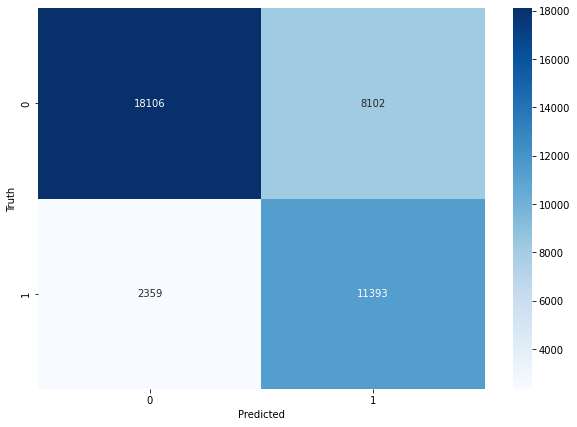

In [126]:
print(classification_report(actual, predicted))
#print(classification_report(data['actual labels'],data['predicted labels']))
  # Confusion matrix
print("Confusion matrix is shown below")
cm=confusion_matrix(actual, predicted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')


matrix and classification shows 74% accuracy in results of DL method and Win probability model

In [127]:
win_1[380:400]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target,DL_stage_result,predicted_result
1349,Australia,Sri Lanka,Brisbane,65.0,88.0,9,9.937500,4.431818,117.0,0.8,99.2,14.0,73.7,26.3,31,53.0,1,1
1350,Australia,Sri Lanka,Brisbane,63.0,87.0,9,10.000000,4.344828,117.0,0.8,99.2,14.0,73.7,26.3,31,55.0,1,1
1351,Australia,Sri Lanka,Brisbane,62.0,86.0,9,9.882353,4.325581,117.0,0.7,99.3,14.0,73.7,26.3,31,56.0,1,1
1352,Australia,Sri Lanka,Brisbane,62.0,85.0,9,9.600000,4.376471,117.0,0.7,99.3,14.0,73.7,26.3,31,56.0,1,1
1353,Australia,Sri Lanka,Brisbane,61.0,84.0,9,9.500000,4.357143,117.0,0.7,99.3,14.0,73.7,26.3,31,57.0,1,1
1354,Australia,Sri Lanka,Brisbane,60.0,83.0,9,9.405405,4.337349,117.0,0.6,99.4,13.0,69.4,30.6,36,58.0,1,1
1355,Australia,Sri Lanka,Brisbane,59.0,83.0,9,9.567568,4.265060,117.0,0.6,99.4,13.0,69.4,30.6,36,59.0,1,1
1356,Australia,Sri Lanka,Brisbane,58.0,82.0,9,9.473684,4.243902,117.0,0.6,99.4,13.0,69.4,30.6,36,60.0,1,1
1357,Australia,Sri Lanka,Brisbane,57.0,81.0,9,9.384615,4.222222,117.0,0.5,99.5,13.0,69.4,30.6,36,61.0,1,1
1358,Australia,Sri Lanka,Brisbane,56.0,80.0,9,9.300000,4.200000,117.0,0.5,99.5,13.0,69.4,30.6,36,62.0,1,1


In [128]:
win_1[430:443]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target,DL_stage_result,predicted_result
1521,Australia,Sri Lanka,Melbourne,143.0,118.0,10,0.000000,7.271186,142.0,2.0,98.0,19.0,96.1,3.9,6,0.0,0,1
1522,Australia,Sri Lanka,Melbourne,142.0,117.0,10,2.000000,7.282051,142.0,1.9,98.1,19.0,96.1,3.9,6,1.0,0,1
1523,Australia,Sri Lanka,Melbourne,142.0,116.0,10,1.500000,7.344828,142.0,1.9,98.1,19.0,96.1,3.9,6,1.0,0,1
1524,Australia,Sri Lanka,Melbourne,140.0,115.0,10,3.600000,7.304348,142.0,1.8,98.2,19.0,96.1,3.9,6,3.0,0,1
1525,Australia,Sri Lanka,Melbourne,140.0,114.0,10,3.000000,7.368421,142.0,1.8,98.2,19.0,96.1,3.9,6,3.0,0,1
1526,Australia,Sri Lanka,Melbourne,139.0,113.0,10,3.428571,7.380531,142.0,1.7,98.3,18.0,92.2,7.8,12,4.0,0,1
1527,Australia,Sri Lanka,Melbourne,139.0,112.0,10,3.000000,7.446429,142.0,1.7,98.3,18.0,92.2,7.8,12,4.0,0,1
1528,Australia,Sri Lanka,Melbourne,139.0,111.0,10,2.666667,7.513514,142.0,1.7,98.3,18.0,92.2,7.8,12,4.0,0,1
1529,Australia,Sri Lanka,Melbourne,135.0,110.0,10,4.800000,7.363636,142.0,1.4,98.6,18.0,92.2,7.8,12,8.0,0,1
1530,Australia,Sri Lanka,Melbourne,134.0,109.0,10,4.909091,7.376147,142.0,1.4,98.6,18.0,92.2,7.8,12,9.0,0,1


In [129]:
win_1['DL_stage_result'].dtype

dtype('int32')

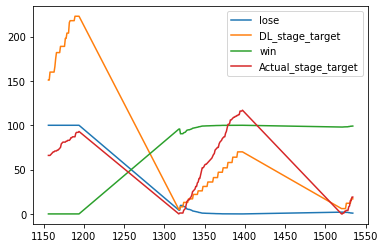

In [130]:
game = win_1[310:444]
game = game[["lose", "DL_stage_target",'win','Actual_stage_target']]
lines = game.plot.line()

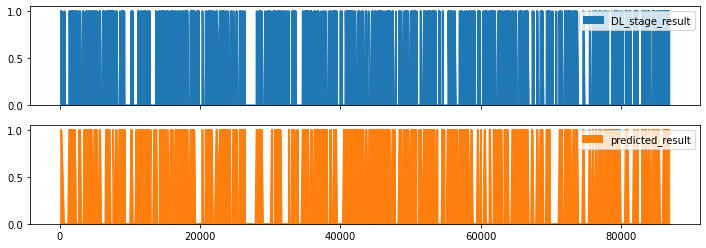

In [131]:
game = win_1
game = game[[ "DL_stage_result",'predicted_result']]
lines = game.plot.area(figsize=(12, 4), subplots=True)

Text(0, 0.5, 'PROBABILITY')

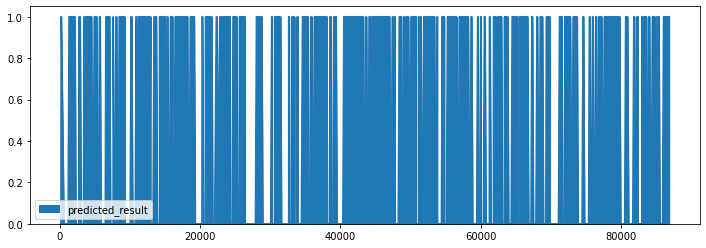

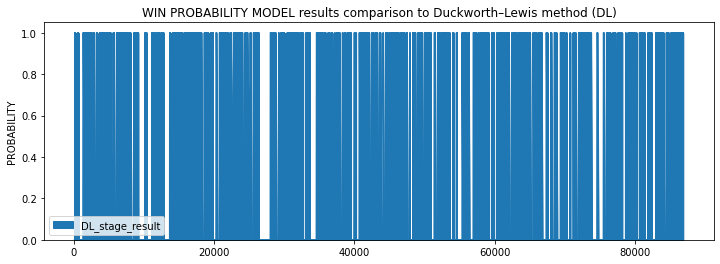

In [132]:
game = win_1
game1 = win_1
game = game[['predicted_result']]
game1 = game1[[ "DL_stage_result"]]
lines = game.plot.area(figsize=(12, 4), subplots=True)
lines = game1.plot.area(figsize=(12, 4), subplots=True)
plt.title('WIN PROBABILITY MODEL results comparison to Duckworth–Lewis method (DL)' )
plt.ylabel("PROBABILITY")

Text(0.5, 0, 'ALL BALLS Bowled IN THE DATA')

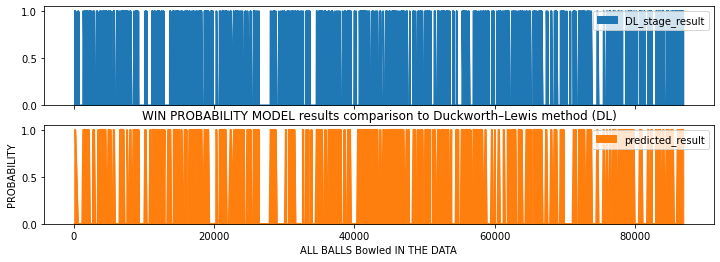

In [133]:
game = win_1
game = game[[ "DL_stage_result",'predicted_result']]
lines = game.plot.area(figsize=(12, 4), subplots=True)
plt.title('WIN PROBABILITY MODEL results comparison to Duckworth–Lewis method (DL)' )
plt.ylabel("PROBABILITY")
plt.xlabel('ALL BALLS Bowled IN THE DATA')
#plt.legend(title='SUBJECT',title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))


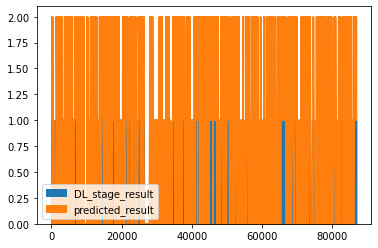

In [134]:
game = win_1
game = game[[ "DL_stage_result",'predicted_result']]
lines = game.plot.area()

In [135]:
win_1['DL_stage_result'].describe()

count    39960.000000
mean         0.344144
std          0.475094
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: DL_stage_result, dtype: float64

In [136]:
win_1['predicted_result'].describe()

count    39960.000000
mean         0.487863
std          0.499859
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: predicted_result, dtype: float64

In [137]:
win_1[0:4]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,crr,rrr,total_runs_x,lose,win,overs_left,Resources_score,Utilized_Resources,DL_stage_target,Actual_stage_target,DL_stage_result,predicted_result
121,South Africa,India,Centurion,189.0,119.0,10,0.0,9.529412,188.0,76.9,23.1,19.0,96.1,3.9,8,0.0,0,0
122,South Africa,India,Centurion,189.0,118.0,10,0.0,9.610169,188.0,77.1,22.9,19.0,96.1,3.9,8,0.0,0,0
123,South Africa,India,Centurion,189.0,117.0,10,0.0,9.692308,188.0,77.3,22.7,19.0,96.1,3.9,8,0.0,0,0
124,South Africa,India,Centurion,189.0,116.0,10,0.0,9.775862,188.0,77.5,22.5,19.0,96.1,3.9,8,0.0,0,0


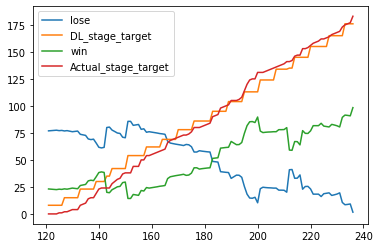

In [138]:
game = win_1[0:116]
game = game[["lose", "DL_stage_target",'win','Actual_stage_target']]
lines = game.plot.line()

<AxesSubplot:xlabel='win'>

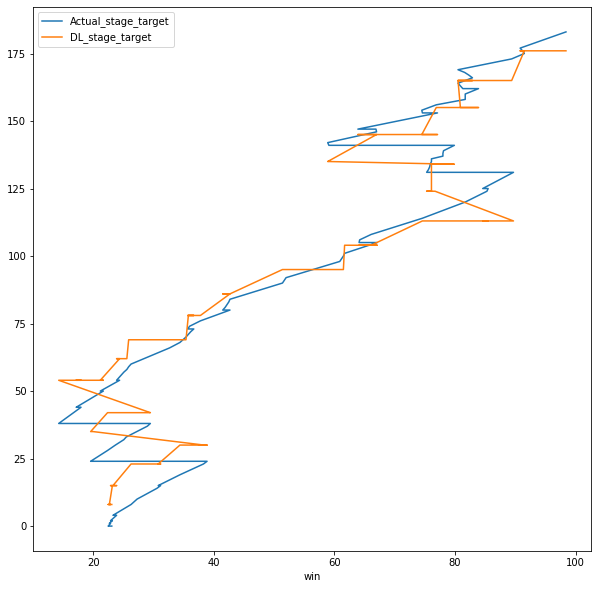

In [139]:
# plot multiple columns such as population and year from dataframe
game.plot(x="win", y=["Actual_stage_target", "DL_stage_target"],
        kind="line", figsize=(10, 10))

In [140]:
import numbers
rat = [x for x in rating if isinstance(x, numbers.Number)]

In [141]:
rat

[96.1,
 96.1,
 96.1,
 96.1,
 96.1,
 96.1,
 92.2,
 92.2,
 92.2,
 92.2,
 92.2,
 92.2,
 88.2,
 88.2,
 88.2,
 88.2,
 88.2,
 88.2,
 84.1,
 84.1,
 84.1,
 84.1,
 81.8,
 81.8,
 77.9,
 77.9,
 77.9,
 77.9,
 77.9,
 77.9,
 71.4,
 71.4,
 71.4,
 71.4,
 71.4,
 71.4,
 71.4,
 67.3,
 67.3,
 67.3,
 67.3,
 67.3,
 67.3,
 63.3,
 63.3,
 63.3,
 63.3,
 63.3,
 63.3,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 54.4,
 54.4,
 54.4,
 54.4,
 54.4,
 54.4,
 54.4,
 49.8,
 49.8,
 49.8,
 49.8,
 49.8,
 49.8,
 45.1,
 45.1,
 45.1,
 45.1,
 45.1,
 45.1,
 40.1,
 40.1,
 40.1,
 40.1,
 40.1,
 40.1,
 34.3,
 34.3,
 34.3,
 34.3,
 34.3,
 34.3,
 29.2,
 29.2,
 29.2,
 29.2,
 29.2,
 28.4,
 28.4,
 23.3,
 23.3,
 23.3,
 23.3,
 23.3,
 23.3,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 12.4,
 12.4,
 12.4,
 12.4,
 12.4,
 12.4,
 6.4,
 6.4,
 6.4,
 6.4,
 93.3,
 93.3,
 93.3,
 93.3,
 93.3,
 93.3,
 89.6,
 89.6,
 89.6,
 89.6,
 89.6,
 89.6,
 85.7,
 85.7,
 85.7,
 85.7,
 85.7,
 85.7,
 81.8,
 81.8,
 81.8,
 79.0,
 79.0,
 79.0,
 75.3,
 75.3,
 75.3,
 75

In [142]:
delivery_df['match_id'].unique()

array([1122286, 1145982, 1183524, 1183525, 1183526, 1183527, 1183528,
       1183529, 1185313, 1185314, 1185315, 1185316, 1185317, 1185318,
       1187005, 1187006, 1187013, 1187014, 1187015, 1187018, 1187019,
       1187020, 1187665, 1187666, 1187667, 1187668, 1187669, 1187677,
       1187678, 1187679, 1187680, 1187681, 1188621, 1188622, 1188623,
       1192875, 1192876, 1192877, 1193494, 1193495, 1193496, 1197140,
       1197141, 1197142, 1197143, 1197144, 1197145, 1198235, 1198236,
       1198237, 1198245, 1198246, 1198489, 1198490, 1198491, 1202243,
       1202244, 1203676, 1203678, 1213058, 1213059, 1213874, 1213875,
       1214670, 1214671, 1216416, 1216417, 1216418, 1223952, 1223953,
       1223954, 1233464, 1233465, 1233466, 1233954, 1233955, 1233959,
       1233960, 1233961, 1233971, 1233972, 1233973, 1233974, 1233975,
       1233979, 1233980, 1233981, 1237122, 1237123, 1237124, 1239541,
       1239542, 1243019, 1243020, 1243021, 1243388, 1243389, 1243390,
       1243391, 1243

In [143]:
temp_df,target = match_progression(delivery_df,1122286,pipe)
temp_df.head()

Target- 188.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
126,1,0.0,0,77.3,22.7
132,2,3.0,0,76.7,23.3
138,3,11.0,0,69.2,30.8
144,4,9.0,1,80.4,19.6
150,5,14.0,0,70.5,29.5


In [144]:
#match_described =  delivery_df['match_id']== 1198491
match_described = delivery_df.loc[delivery_df['match_id'] == 1122286]
match_described.head()


,match_id,city,result,total_runs_x,season,venue,innings,batting_team,bowling_team,batsman,...,ball,Over,Ball,total_runs_y,current_score,runs_left,balls_left,wickets,crr,rrr
121,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.1,1.0,1,0.0,0.0,189.0,119.0,10,0.0,9.529412
122,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.2,1.0,2,0.0,0.0,189.0,118.0,10,0.0,9.610169
123,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.3,1.0,3,0.0,0.0,189.0,117.0,10,0.0,9.692308
124,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.4,1.0,4,0.0,0.0,189.0,116.0,10,0.0,9.775862
125,1122286,Centurion,1,188.0,2017/18,SuperSport Park,2.0,South Africa,India,RR Hendricks,...,0.5,1.0,5,1.0,1.0,188.0,115.0,10,1.2,9.808696


### Visuals and final pickel file download

Text(0.5, 1.0, 'South Africa vs India Target-188.0')

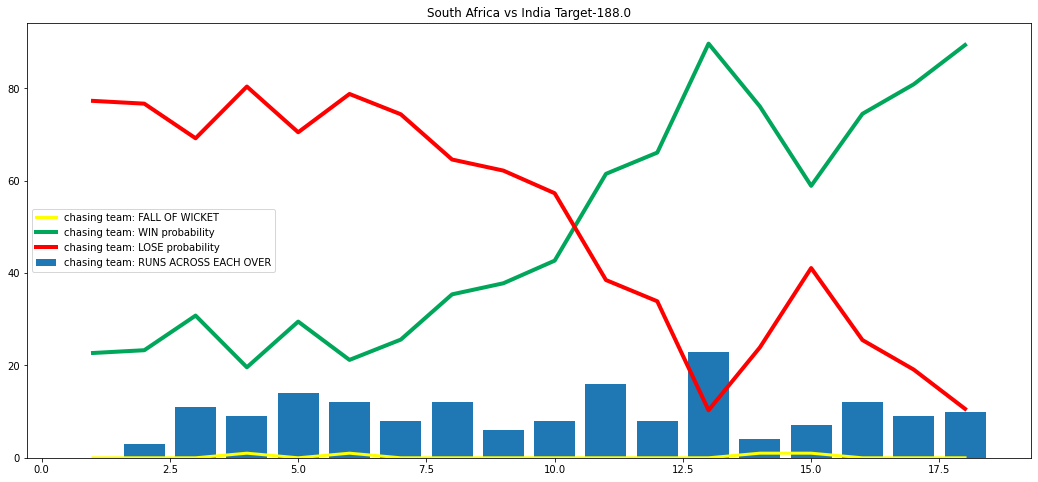

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3,label='chasing team: FALL OF WICKET')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4,label='chasing team: WIN probability')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='chasing team: LOSE probability')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],label='chasing team: RUNS ACROSS EACH OVER')
plt.legend()
plt.title('South Africa vs India Target-' +  str(target))


In [146]:
temp_df,target = match_progression(delivery_df,1077948,pipe)
temp_df.head()

Target- 132.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
64705,1,1.0,0,47.2,52.8
64711,2,8.0,1,61.0,39.0
64718,3,6.0,0,54.7,45.3
64724,4,4.0,0,50.9,49.1
64730,5,9.0,0,41.1,58.9


In [147]:
#match_described =  delivery_df['match_id']== 1198491
match_described = delivery_df.loc[delivery_df['match_id'] == 1077948]
match_described.head()


,match_id,city,result,total_runs_x,season,venue,innings,batting_team,bowling_team,batsman,...,ball,Over,Ball,total_runs_y,current_score,runs_left,balls_left,wickets,crr,rrr
64700,1077948,Trinidad,0,132.0,2017,"Queen's Park Oval, Port of Spain",2.0,West Indies,Pakistan,E Lewis,...,0.1,1.0,1,0.0,0.0,133.0,119.0,10,0.0,6.705882
64701,1077948,Trinidad,0,132.0,2017,"Queen's Park Oval, Port of Spain",2.0,West Indies,Pakistan,E Lewis,...,0.2,1.0,2,1.0,1.0,132.0,118.0,10,3.0,6.711864
64702,1077948,Trinidad,0,132.0,2017,"Queen's Park Oval, Port of Spain",2.0,West Indies,Pakistan,CAK Walton,...,0.3,1.0,3,0.0,1.0,132.0,117.0,10,2.0,6.769231
64703,1077948,Trinidad,0,132.0,2017,"Queen's Park Oval, Port of Spain",2.0,West Indies,Pakistan,CAK Walton,...,0.4,1.0,4,0.0,1.0,132.0,116.0,10,1.5,6.827586
64704,1077948,Trinidad,0,132.0,2017,"Queen's Park Oval, Port of Spain",2.0,West Indies,Pakistan,CAK Walton,...,0.5,1.0,5,1.0,2.0,131.0,115.0,10,2.4,6.834783


Text(0.5, 1.0, 'Pakistan vs West Indies Target-132.0')

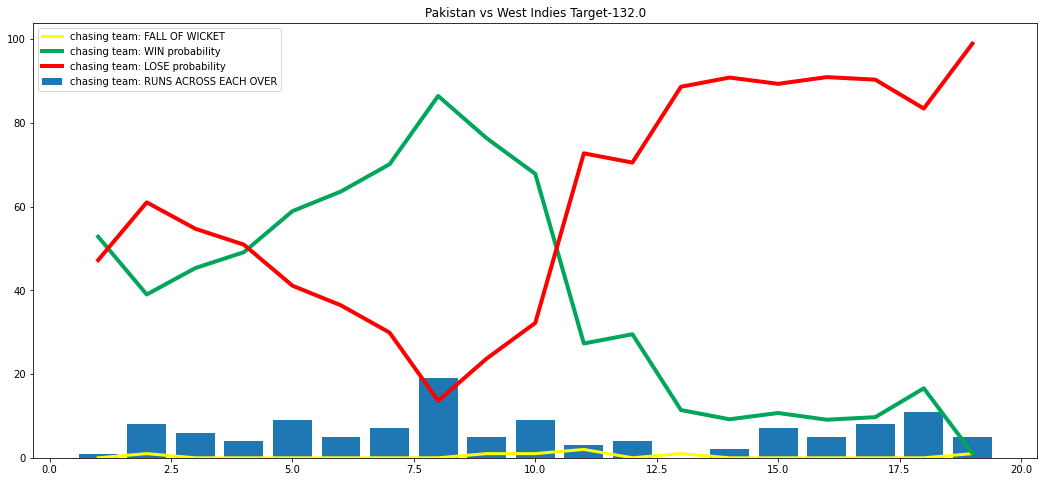

In [148]:


import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3,label='chasing team: FALL OF WICKET')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4,label='chasing team: WIN probability')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='chasing team: LOSE probability')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],label='chasing team: RUNS ACROSS EACH OVER')
plt.legend()
plt.title('Pakistan vs West Indies Target-' +  str(target))


Text(0, 0.5, 'PROBABILITY')

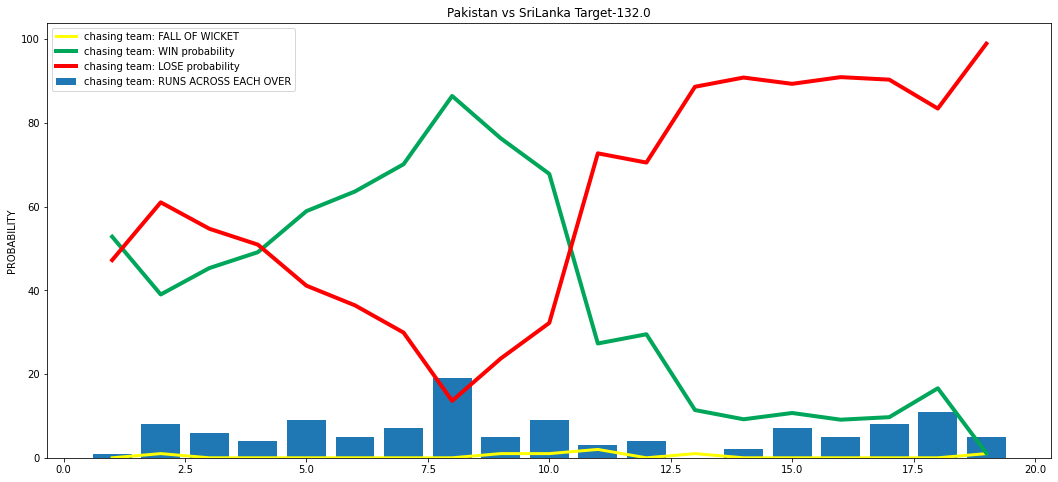

In [149]:



import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3,label='chasing team: FALL OF WICKET')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4,label='chasing team: WIN probability')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='chasing team: LOSE probability')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],label='chasing team: RUNS ACROSS EACH OVER')
plt.legend()
plt.title('Pakistan vs SriLanka Target-' +  str(target))
plt.ylabel("PROBABILITY")

In [150]:
teams


['India',
 'Afghanistan',
 'Australia',
 'South Africa',
 'New Zealand',
 'West Indies',
 'Sri Lanka',
 'Bangladesh',
 'Ireland',
 'England',
 'Pakistan',
 'Zimbabwe']

In [151]:
delivery_df['city'].unique()

array(['Centurion', 'Dehra Dun', 'Adelaide', 'Brisbane', 'Melbourne',
       'Sydney', 'Canberra', 'Perth', 'East London', 'Durban',
       'Johannesburg', 'Port Elizabeth', 'Cape Town', 'Chandigarh',
       'Bengaluru', 'Delhi', 'Rajkot', 'Nagpur', 'Hyderabad',
       'Thiruvananthapuram', 'Mumbai', 'Christchurch', 'Wellington',
       'Nelson', 'Napier', 'Auckland', 'Hamilton', 'Mount Maunganui',
       'Lauderhill', 'Providence', 'Kandy', 'Lucknow', 'Dhaka',
       'Chattogram', 'Southampton', 'Manchester', 'Lahore', 'Indore',
       'Pune', "St George's", 'Basseterre', 'Greater Noida', '0',
       'Dunedin', 'Paarl', 'Leeds', 'Ahmedabad', 'Cardiff', 'Dublin',
       'Belfast', 'Abu Dhabi', 'Coolidge', 'Bridgetown', 'Harare',
       'Colombo', 'Gros Islet', 'Bready', 'Dubai', 'Sharjah',
       'New Zealand', 'Australia', 'Jaipur', 'Ranchi', 'Kolkata',
       'Dharamsala', 'Karachi', 'Bangalore', 'Victoria', 'Taunton',
       'Chester-le-Street', 'Kanpur', 'Hobart', 'Bloemfontein',
 

In [152]:
delivery_df['venue'].unique()

array(['SuperSport Park',
       'Rajiv Gandhi International Cricket Stadium, Dehradun',
       'Adelaide Oval', 'Brisbane Cricket Ground, Woolloongabba',
       'Melbourne Cricket Ground', 'Sydney Cricket Ground', 'Manuka Oval',
       'Perth Stadium', 'Buffalo Park', 'Kingsmead',
       'The Wanderers Stadium', "St George's Park", 'Newlands',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium',
       'Saurashtra Cricket Association Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Rajiv Gandhi International Stadium, Uppal',
       'Greenfield International Stadium', 'Wankhede Stadium',
       'Hagley Oval', 'Westpac Stadium', 'Saxton Oval', 'McLean Park',
       'Eden Park', 'Seddon Park', 'Bay Oval',
       'Central Broward Regional Park Stadium Turf Ground',
       'Providence Stadium, Guyana',
       'Pallekele International Cricket Stadium',
       'Bharat Ratna Shri Atal Bihari Vajpayee Eka

In [153]:
teams
delivery_df['city'].unique()
import pickle
pickle.dump(pipe,open('win_prob.pkl','wb'))